In [141]:
import numpy as np
import pandas
from pandas import DataFrame, Series
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from matplotlib.pyplot import scatter, xlabel, ylabel, savefig
df = pd.read_csv('data/o-ring-erosion-or-blowby.csv')
df.columns=['No','Dis','Temp','Psi','Order']

1. Number of O-rings at risk on a given flight 
2. Number experiencing thermal distress 
3. Launch temperature (degrees F) 
4. Leak-check pressure (psi) 
5. Temporal order of flight

In [142]:
df

,No,Dis,Temp,Psi,Order
0,6,1,70,50,2
1,6,0,69,50,3
2,6,0,68,50,4
3,6,0,67,50,5
4,6,0,72,50,6
5,6,0,73,100,7
6,6,0,70,100,8
7,6,1,57,200,9
8,6,1,63,200,10
9,6,1,70,200,11


# 1. Checking of Linearity

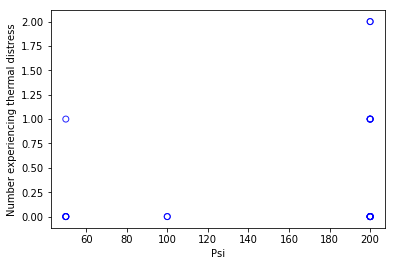

In [143]:
scatter( df.Psi, df.Dis,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=0.85 )
xlabel('Psi')
ylabel('Number experiencing thermal distress')
savefig('picpsi.png', fmt='png', dpi=100)

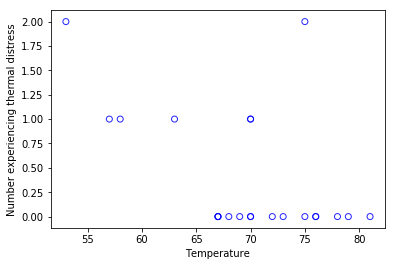

In [144]:
scatter( df.Temp, df.Dis,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=0.85 )
xlabel('Temperature')
ylabel('Number experiencing thermal distress')
savefig('pic.png', fmt='png', dpi=100)

# 2. Performing the Multiple Linear Regression


In [156]:
X = df[["Temp","Psi"]]
y = df["Dis"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Dis   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     5.256
Date:                Sat, 01 Dec 2018   Prob (F-statistic):             0.0146
Time:                        01:21:49   Log-Likelihood:                -20.784
No. Observations:                  22   AIC:                             45.57
Df Residuals:                      20   BIC:                             47.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Temp          -0.0032      0.005     -0.639      0.530      -0.014       0.007
Psi            0.0038      0.002      1.831      0.082      -0.001       0.008
==============================================================================
Omnibus:                        4.815   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.609
Skew:                           0.992   Prob(JB):                        0.165
Kurtosis:                       3.003   Cond. No.                         7.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Use statsmodels to do a multiple linear regression

In [160]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    Dis   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     5.166
Date:                Sat, 01 Dec 2018   Prob (F-statistic):             0.0162
Time:                        01:22:20   Log-Likelihood:                -16.991
No. Observations:                  22   AIC:                             39.98
Df Residuals:                      19   BIC:                             43.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4529      1.235      2.797      0.0

# 4. Predictions

In [157]:
data = np.matrix( df )
lm = LinearRegression()
model = lm.fit(X,y)

In [158]:
predictions = lm.predict(X)
print(predictions)

[ 0.11454766  0.16411795  0.21368824  0.26325853  0.01540708  0.09737997
  0.24609084  1.15359101  0.85616926  0.50917722  0.11261489  0.65788809
  1.35187217  0.65788809  0.26132576  0.50917722 -0.03609599  0.21175547
  0.0630446   0.26132576  0.21175547  1.10402071]


In [159]:
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)
Temperature = 31
# prediction with sklearn
for PSI in [0,50,100,200]:
    predicter = lm.predict([[Temperature ,PSI]])
    print ('Prediction at Temperature %d and %d PSI: %.4f O-rings Blowby: '%(Temperature,PSI,predicter))
        


Intercept: 
 3.4529248652569535
Coefficients: 
 [-0.04957029  0.00263086]
Prediction at Temperature 31 and 0 PSI: 1.9162 O-rings Blowby: 
Prediction at Temperature 31 and 50 PSI: 2.0478 O-rings Blowby: 
Prediction at Temperature 31 and 100 PSI: 2.1793 O-rings Blowby: 
Prediction at Temperature 31 and 200 PSI: 2.4424 O-rings Blowby: 


# 5. Predictions with GUI input and output

In [161]:

import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
regr=lm

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Temperature: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type PSI: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)


def values(): 
    global New_Temperature #our 1st input variable
    New_Temperature = float(entry1.get()) 
    
    global New_PSI #our 2nd input variable
    New_PSI = float(entry2.get()) 
    
    Prediction_result  = ('Dis: ', regr.predict([[New_Temperature ,New_PSI]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict O-Ring Distress',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 

#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['Temp'].astype(float),df['Dis'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend() 
ax3.set_xlabel('Temp')
ax3.set_title('Temp Vs. Dis')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['Psi'].astype(float),df['Dis'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend() 
ax4.set_xlabel('Psi')
ax4.set_title('Psi Vs. Dis')

root.mainloop()